# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import os
root_dir = "/content/gdrive/MyDrive/"
project_folder = "Colab Notebooks/Ultrasound ML/"
os.chdir(root_dir + project_folder)

# Example 1

In [3]:
import pandas as pd

data_dir=root_dir + project_folder + 'ml/data/Ultrasound/'
df = pd.read_csv(data_dir + 'CorrectedImgsReduced_PrincipalComponentsAnalysis.csv')

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

[STATUS] Extracting Data
[STATUS] Training Estimators
[STATUS] Best Runs:
         DataSet  Target                                           Selected          Model  subjects  avg_train_accuracy  avg_test_accuracy  std_train_accuracy  std_test_accuracy                                          estimator
57  AutoDataset  class5  v3, v4, v7, v2, v6, v5, v9, v1, v17, v18, v14,...  MLPClassifier       931            0.713481           0.599477            0.016162           0.064260  MLPClassifier(activation='logistic', alpha=0.0...
89  AutoDataset  class5  v3, v4, v7, v2, v6, v5, v9, v1, v17, v18, v14,...  MLPClassifier       931            0.761282           0.596251            0.014463           0.068094  MLPClassifier(activation='logistic', alpha=0.0...
93  AutoDataset  class5  v3, v4, v7, v2, v6, v5, v9, v1, v17, v18, v14,...  MLPClassifier       931            0.764500           0.593019            0.016684           0.066474  MLPClassifier(activation='logistic', alpha=0.0...
69  AutoD

<Figure size 432x288 with 0 Axes>

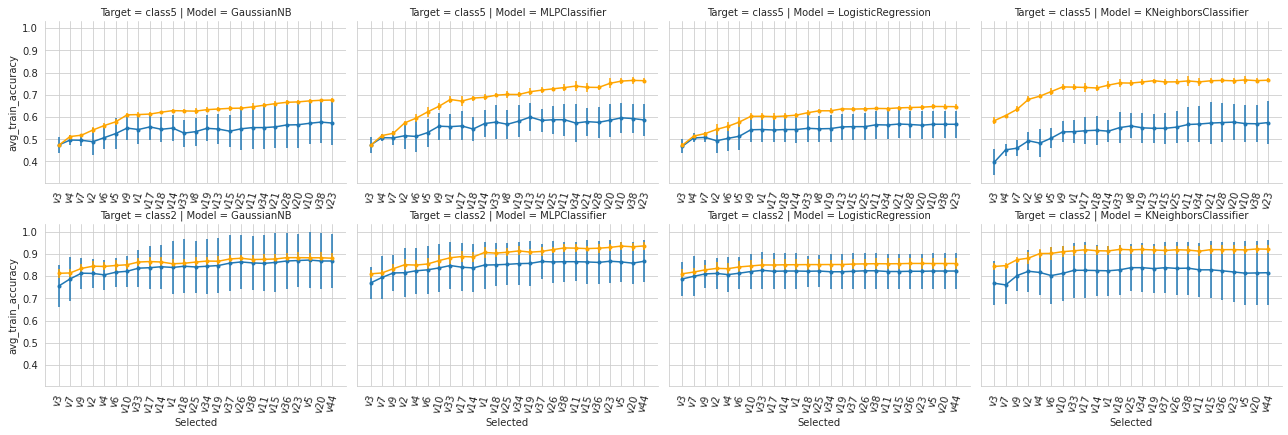

/content/gdrive/My Drive/Colab Notebooks/Ultrasound ML/ml/feature_selection/feature_selection.py:272: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [6]:
from ml.feature_selection.feature_selection import select_and_run_targs
from ml.SciKit_ML import *

targets = ['class5','class2']
features = ['v' + str(n) for n in range(1, 800 + 1)]
models = [
    GaussianNB(),
    MLPClassifier(hidden_layer_sizes=(20), activation="logistic", max_iter=300),
    LogisticRegression(penalty="elasticnet",C=0.01,solver="saga",l1_ratio=0.2,max_iter=400),
    KNeighborsClassifier(n_neighbors=5)
    ]

results = select_and_run_targs(
    df, features, targets, models, 
    upto=25, graph_r2=True, eval_type='c',show_best_runs=8, n_cores=-1
    )

In [ ]:
results = select_and_run_targs(
    df, features, targets, model, 
    select_counts=range(5,100+1,5), graph_r2=True, eval_type='c',show_best_runs=8, n_cores=-1
    )

In [ ]:
from ml.feature_selection.feature_selection import select_and_run_batches
selector_options = {
        **{
            'Corr_' + str(n): lambda df, feature_cnames, target_cname:
            select_n_best_metric(df, feature_cnames, target_cname, n=n)
            for n in [2]},
        'mRMR': lambda df, feature_cnames, target_cname:
            mRMR(df, feature_cnames, target_cname, return_best=1)[0, 1].tolist()
    }

select_and_run_batches(df,{''},'class2',models,selector_options)